In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score

import sys
import os
from joblib import Memory
import joblib

from backtest import *
from utils import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

2024-12-03 16:46:14,156	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.8.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
DATA_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/data/'
CLASSIFIER_DATA_PATH = DATA_PATH + 'classifier_full/'
ANALYSIS_PATH = '/Users/austingalm/Documents/GitHub/fpi_project_lab_autumn2024/analysis/'

In [3]:
DIM_RED_N_COMPONENTS_LIST = [0.975] #[0.95, 0.975, 0.99, None]
N_ESTIMATORS_LIST = [100] #[10,50,100,500]
MIN_SAMPLES_SPLIT_LIST = [2] #[2,10, 30, 50, 100, 200, 300, 700, 1000]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
MAX_DEPTH_LIST = [4] #[2, 4, 8, 16, 32, 64, None]
CLASS_WEIGHT_LIST = [None] #['balanced_subsample', 'balanced', None]

# Broad Assets Universe

In [4]:
UNIVERSE = 'broad_asset'
ASSETS = ['Asset ' + str(i) for i in range(1, 12)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [5]:
backtest = Backtest(model={'model':RandomForestClassifier(), 'dim_red':PCA()}, base_per='2004-04-20', update_freq=26)

In [6]:
backtest.read_returns(data_path=DATA_PATH, universe_returns='broad_assets_weekly_rets')
backtest.compute_lookbacks()
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [7]:
param_grid = {'dim_red__n_components': DIM_RED_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
backtest.record_predictions(assets=ASSETS, param_grid=param_grid)
backtest.calc_strat_rets(strat_name = 'Random Forest Selection', selection='classifier', weighting='equal')

Completed predictions for period 1 of 40
Completed predictions for period 2 of 40
Completed predictions for period 3 of 40
Completed predictions for period 4 of 40
Completed predictions for period 5 of 40
Completed predictions for period 6 of 40
Completed predictions for period 7 of 40
Completed predictions for period 8 of 40
Completed predictions for period 9 of 40
Completed predictions for period 10 of 40
Completed predictions for period 11 of 40
Completed predictions for period 12 of 40
Completed predictions for period 13 of 40
Completed predictions for period 14 of 40
Completed predictions for period 15 of 40
Completed predictions for period 16 of 40
Completed predictions for period 17 of 40
Completed predictions for period 18 of 40
Completed predictions for period 19 of 40
Completed predictions for period 20 of 40
Completed predictions for period 21 of 40
Completed predictions for period 22 of 40
Completed predictions for period 23 of 40
Completed predictions for period 24 of 40
C

In [8]:
backtest.strat_rets

,Random Forest Selection Strategy
Date,
2004-10-11,0.0041
2004-10-18,-0.0094
2004-10-25,0.0050
2004-11-01,0.0162
2004-11-08,0.0233
...,...
2024-08-05,-0.0404
2024-08-12,0.0351
2024-08-19,0.0476


,Random Forest Selection Strategy
Annualized Mean,0.0313
Annualized Vol,0.1177
Min,-0.2415
Max,0.2001
Skewness,-0.3240
Excess Kurtosis,8.2775
Historical VaR (5.00%),-0.0479
Annualized Historical VaR (5.00%),-0.1659
Historical CVaR (5.00%),-0.0797
Annualized Historical CVaR (5.00%),-0.2762


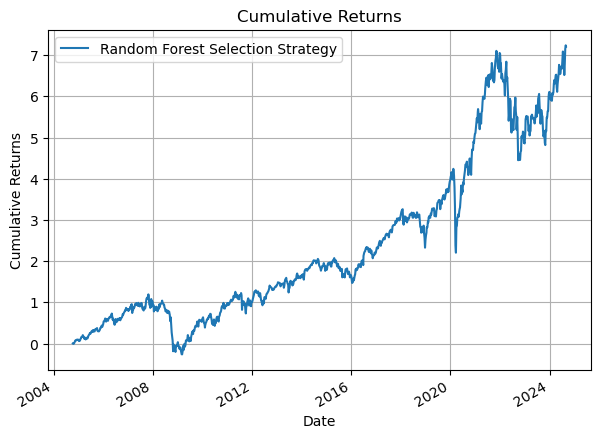

In [9]:
backtest.performance_summary()

In [10]:
display(backtest.predictions)
display(backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2004-10-11,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-18,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-25,0.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000
2004-11-01,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
2004-11-08,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-05,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-12,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-08-19,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,Asset 11
Date,,,,,,,,,,,
2000-07-31,0.0152,0.0757,-0.0023,0.0009,0.0422,0.0050,0.0373,0.0021,-0.0025,-0.0084,-0.0318
2000-08-07,0.0679,0.0526,0.0159,0.0134,0.0365,-0.0237,-0.0196,-0.0116,0.0241,-0.0266,0.0346
2000-08-14,0.0157,0.0023,0.0152,0.0063,0.0171,0.0254,0.0294,0.0369,0.0085,0.0063,0.0481
2000-08-21,0.0095,0.0566,-0.0018,-0.0003,0.0068,-0.0264,0.0016,-0.0024,0.0077,0.0018,0.0384
2000-08-28,0.0184,0.0653,0.0019,0.0041,0.0379,-0.0353,0.0195,-0.0170,0.0019,-0.0095,0.0313
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-12,0.0607,0.0718,-0.0440,-0.0147,0.0210,0.0425,0.0431,0.0882,0.0093,0.0503,0.0583
2024-08-19,0.1006,0.1346,0.0199,-0.0004,0.1037,0.0321,0.0931,0.0771,-0.0238,0.0239,-0.0377
2024-08-26,0.0020,-0.0266,0.0028,0.0064,0.0450,0.0540,0.0290,-0.0180,-0.0195,0.0097,0.0332


In [11]:
eval_rets = backtest.returns.loc[backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,"1,039.0000"
mean,0.0027
std,0.0335
min,-0.2167
25%,-0.0118
50%,0.0035
75%,0.0188
max,0.2156


In [12]:
all_rets = pd.concat([equal_rets, backtest.strat_rets], axis=1)
calc_summary_statistics(all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy
Annualized Mean,0.1422,0.1358
Annualized Vol,0.2413,0.2450
Min,-0.2167,-0.2415
Max,0.2156,0.2001
Skewness,-0.1265,-0.3240
Excess Kurtosis,7.7660,8.2775
Historical VaR (5.00%),-0.0484,-0.0479
Annualized Historical VaR (5.00%),-0.3492,-0.3454
Historical CVaR (5.00%),-0.0781,-0.0797
Annualized Historical CVaR (5.00%),-0.5633,-0.5749


None

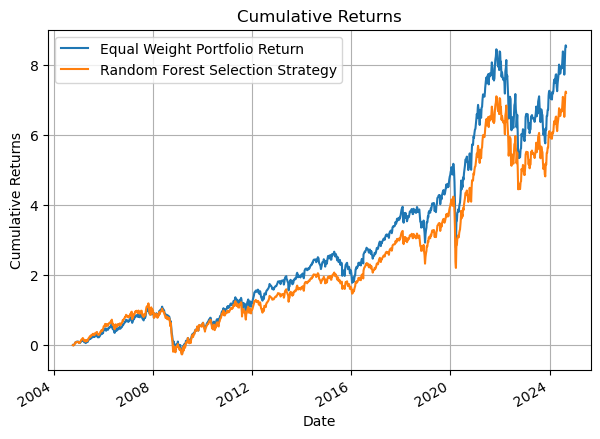

In [13]:
display(calc_cumulative_returns(all_rets))

In [14]:
# Adding MVO to the mix
backtest.calc_strat_rets(strat_name = 'Random Forest MVO', selection='classifier', weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})
backtest.calc_strat_rets(strat_name = 'No Selection MVO', selection=None, weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})

In [ ]:
backtest.mvo_weights

,Random Forest Selection Strategy,Random Forest MVO Strategy,No Selection MVO Strategy
Date,,,
2004-10-11,0.0041,0.0000,0.0941
2004-10-18,-0.0094,0.0051,-0.0064
2004-10-25,0.0050,0.0540,0.0287
2004-11-01,0.0162,-0.0399,-0.0297
2004-11-08,0.0233,-0.0106,-0.0133
...,...,...,...
2024-08-05,-0.0404,-0.0663,-0.0726
2024-08-12,0.0351,0.0397,0.0512
2024-08-19,0.0476,0.0393,0.0398


In [16]:
all_rets = pd.concat([equal_rets, backtest.strat_rets], axis=1)
calc_summary_statistics(all_rets, annual_factor=52, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy,Random Forest MVO Strategy,No Selection MVO Strategy
Annualized Mean,0.1422,0.1358,0.1573,0.1879
Annualized Vol,0.2413,0.2450,0.3086,0.3108
Min,-0.2167,-0.2415,-0.1760,-0.2241
Max,0.2156,0.2001,0.2739,0.2877
Skewness,-0.1265,-0.3240,0.2299,0.0513
Excess Kurtosis,7.7660,8.2775,4.1436,4.4531
Historical VaR (5.00%),-0.0484,-0.0479,-0.0689,-0.0656
Annualized Historical VaR (5.00%),-0.3492,-0.3454,-0.4971,-0.4733
Historical CVaR (5.00%),-0.0781,-0.0797,-0.0971,-0.0967
Annualized Historical CVaR (5.00%),-0.5633,-0.5749,-0.7003,-0.6973


None

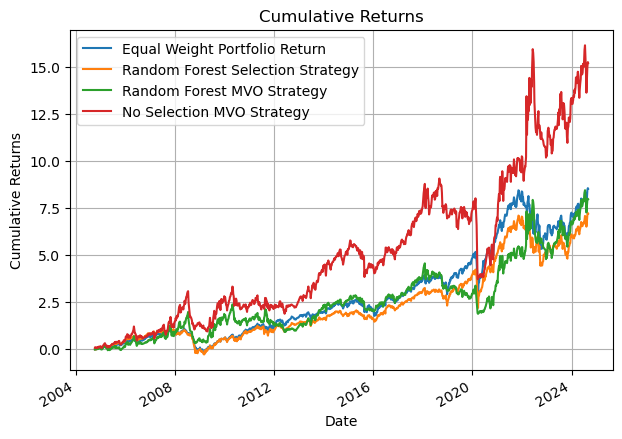

In [17]:
display(calc_cumulative_returns(all_rets))

In [ ]:
# Writing key results from Backtest
# Backtest Hyperparameter Selections
with open(DATA_PATH + "broad_assets_hyperparams.txt", "w") as ba_hyperparams:
    for params, i in zip(backtest.model._params_hist, range(len(backtest.model._params_hist))):
        ba_hyperparams.write(f'Broad Assets Backtest Period {i} Params:\n')
        for param in params:
            ba_hyperparams.write(f'\t{param}: {params[param]}\n')
        ba_hyperparams.write('\n')

# Backtest Classifier Selections
# backtest.predictions.to_excel('broad_assets_predictions.xlsx')

(raylet) The autoscaler failed with the following error:
Terminated with signal 15
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/autoscaler/_private/monitor.py", line 709, in <module>
    monitor.run()
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/autoscaler/_private/monitor.py", line 584, in run
    self._run()
  File "/opt/anaconda3/lib/python3.12/site-packages/ray/autoscaler/_private/monitor.py", line 438, in _run
    time.sleep(AUTOSCALER_UPDATE_INTERVAL_S)



: 

# Equity Domestic Universe

In [19]:
UNIVERSE = 'equity_domestic'
ASSETS = ['Asset ' + str(i) for i in range(1, 47)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [20]:
eqd_backtest = Backtest(model={'model':RandomForestClassifier(), 'dim_red':PCA()}, base_per='2004-04-10', update_freq=6)

In [21]:
eqd_backtest.read_returns(data_path=DATA_PATH, universe_returns='equity_domestic_monthly_rets')
eqd_backtest.compute_lookbacks(data_freq='monthly')
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
eqd_backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [22]:
param_grid = {'dim_red__n_components': DIM_RED_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
eqd_backtest.record_predictions(assets=ASSETS, param_grid=param_grid)
eqd_backtest.calc_strat_rets(strat_name = 'Random Forest Selection', selection='classifier', weighting='equal')

Completed predictions for period 1 of 40
Completed predictions for period 2 of 40
Completed predictions for period 3 of 40
Completed predictions for period 4 of 40
Completed predictions for period 5 of 40
Completed predictions for period 6 of 40
Completed predictions for period 7 of 40
Completed predictions for period 8 of 40
Completed predictions for period 9 of 40
Completed predictions for period 10 of 40
Completed predictions for period 11 of 40
Completed predictions for period 12 of 40
Completed predictions for period 13 of 40
Completed predictions for period 14 of 40
Completed predictions for period 15 of 40
Completed predictions for period 16 of 40
Completed predictions for period 17 of 40
Completed predictions for period 18 of 40
Completed predictions for period 19 of 40
Completed predictions for period 20 of 40
Completed predictions for period 21 of 40
Completed predictions for period 22 of 40
Completed predictions for period 23 of 40
Completed predictions for period 24 of 40
C

In [23]:
eqd_backtest.strat_rets

,Random Forest Selection Strategy
Date,
2004-06-01,0.0131
2004-07-01,0.0302
2004-08-02,-0.0040
2004-09-01,0.0119
2004-10-01,0.0368
...,...
2024-04-01,0.0378
2024-05-01,-0.0478
2024-06-03,0.0396


,Random Forest Selection Strategy
Annualized Mean,0.1331
Annualized Vol,0.1841
Min,-0.2503
Max,0.1934
Skewness,-0.5264
Excess Kurtosis,3.4638
Historical VaR (5.00%),-0.0695
Annualized Historical VaR (5.00%),-0.2408
Historical CVaR (5.00%),-0.1178
Annualized Historical CVaR (5.00%),-0.4081


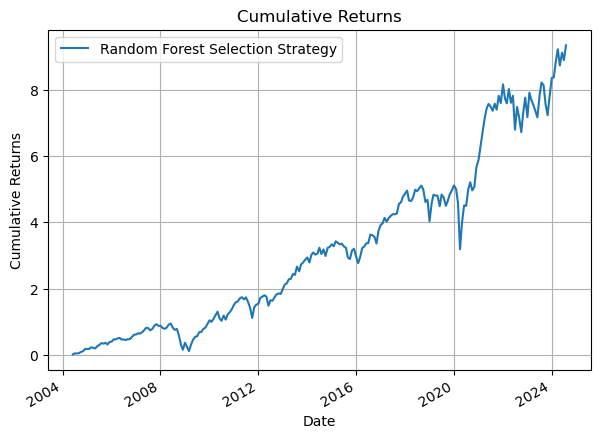

In [24]:
eqd_backtest.performance_summary()

In [25]:
display(eqd_backtest.predictions)
display(eqd_backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2004-06-01,NaN,NaN,NaN,0.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000
2004-07-01,NaN,NaN,NaN,1.0000,0,0,0,0.0000,0,0,...,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000,1.0000
2004-08-02,NaN,NaN,NaN,1.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000
2004-09-01,NaN,NaN,NaN,1.0000,0,0,0,0.0000,0,0,...,1.0000,1.0000,1.0000,0.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2004-10-01,NaN,NaN,NaN,0.0000,0,0,0,1.0000,0,0,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-05-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2024-06-03,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 37,Asset 38,Asset 39,Asset 40,Asset 41,Asset 42,Asset 43,Asset 44,Asset 45,Asset 46
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-03,0.0000,0.0000,0.0000,-0.0338,0.0000,0.0000,0.0000,-0.0137,0.0000,0.0000,...,0.0115,0.0419,0.0675,0.1113,0.0419,0.0177,-0.0411,-0.0118,-0.0171,-0.0013
2001-02-01,0.0000,0.0000,0.0000,-0.0378,0.0000,0.0000,0.0000,0.0048,0.0000,0.0000,...,0.0166,0.0215,-0.0046,0.0319,0.0253,-0.0520,-0.0496,0.0120,0.0114,0.0100
2001-03-01,0.0000,0.0000,0.0000,0.0269,0.0000,0.0000,0.0000,0.0441,0.0000,0.0000,...,-0.0172,0.0704,0.0395,-0.1746,0.0087,0.0011,0.0999,0.0110,0.0135,0.0058
2001-04-02,0.0000,0.0000,0.0000,-0.0210,0.0000,0.0000,0.0000,0.0367,0.0000,0.0000,...,-0.0038,-0.0238,-0.0028,-0.1542,-0.0019,-0.0201,0.0181,0.0008,-0.0176,0.0081
2001-05-01,0.0000,0.0000,0.0000,0.0414,0.0000,0.0000,0.0000,0.0314,0.0000,0.0000,...,0.0053,0.1430,0.0607,0.2815,0.0649,0.0244,0.0337,-0.0122,-0.0239,0.0032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-01,-0.0672,-0.0762,-0.0498,-0.0160,-0.0570,-0.0474,0.0096,-0.0149,-0.0978,-0.0203,...,-0.0728,-0.0724,-0.1059,-0.0831,-0.0480,-0.0287,0.0441,-0.0186,-0.0398,-0.0003
2024-06-03,0.0726,0.0105,0.0971,0.0548,0.0147,0.0757,0.0090,0.0565,-0.0070,-0.0625,...,0.0137,0.0037,0.0567,0.1348,0.0015,-0.0282,0.0741,0.0206,0.0378,0.0063
2024-07-01,-0.0249,-0.0829,-0.0115,0.0312,0.0068,0.0321,-0.0595,-0.0115,-0.1055,-0.0501,...,0.0166,0.0102,-0.0685,-0.0050,-0.0899,0.0122,-0.0617,-0.0019,-0.0153,0.0034


In [26]:
eval_rets = eqd_backtest.returns.loc[eqd_backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,243.0000
mean,0.0100
std,0.0539
min,-0.2503
25%,-0.0162
50%,0.0125
75%,0.0432
max,0.1934


In [27]:
eqd_all_rets = pd.concat([equal_rets, eqd_backtest.strat_rets], axis=1)
calc_summary_statistics(eqd_all_rets, annual_factor=12, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy
Annualized Mean,0.1199,0.1331
Annualized Vol,0.1866,0.1841
Min,-0.2503,-0.2503
Max,0.1934,0.1934
Skewness,-0.5687,-0.5264
Excess Kurtosis,3.5385,3.4638
Historical VaR (5.00%),-0.0680,-0.0695
Annualized Historical VaR (5.00%),-0.2357,-0.2408
Historical CVaR (5.00%),-0.1241,-0.1178
Annualized Historical CVaR (5.00%),-0.4299,-0.4081


None

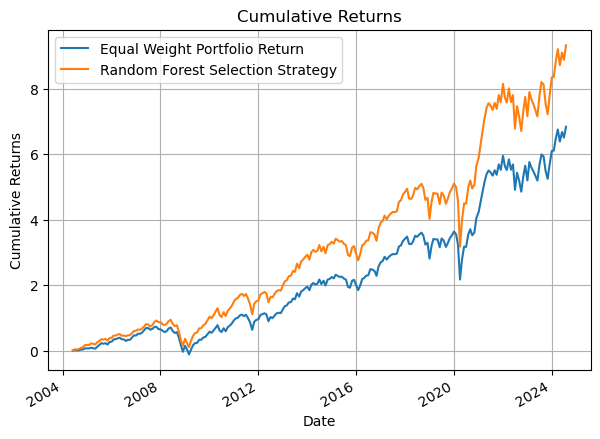

In [28]:
display(calc_cumulative_returns(eqd_all_rets))

In [30]:
# Adding MVO to the mix
eqd_backtest.calc_strat_rets(strat_name = 'Random Forest MVO', selection='classifier', weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})
eqd_backtest.calc_strat_rets(strat_name = 'No Selection MVO', selection=None, weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})

In [ ]:
eqd_backtest.mvo_weights

In [62]:
eqd_all_rets = pd.concat([equal_rets, eqd_backtest.strat_rets], axis=1)
calc_summary_statistics(eqd_all_rets, annual_factor=12, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy,Random Forest MVO Strategy,No Selection MVO Strategy
Annualized Mean,0.0892,0.1331,0.0833,0.0796
Annualized Vol,0.1978,0.1841,0.2094,0.2168
Min,-0.2336,-0.2503,-0.2416,-0.2113
Max,0.1610,0.1934,0.1808,0.1862
Skewness,-0.6043,-0.5264,-0.5102,-0.4203
Excess Kurtosis,2.2563,3.4638,1.2717,0.9287
Historical VaR (5.00%),-0.0881,-0.0695,-0.0949,-0.1064
Annualized Historical VaR (5.00%),-0.3053,-0.2408,-0.3286,-0.3687
Historical CVaR (5.00%),-0.1359,-0.1178,-0.1382,-0.1435
Annualized Historical CVaR (5.00%),-0.4706,-0.4081,-0.4787,-0.4972


None

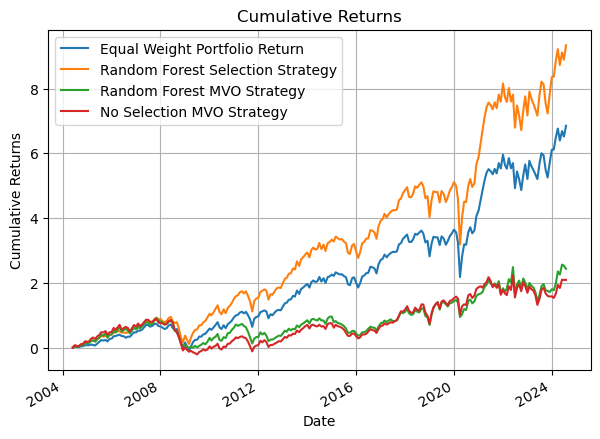

In [32]:
display(calc_cumulative_returns(eqd_all_rets))

In [33]:
# Writing key results from Backtest
# Backtest Hyperparameter Selections
with open(DATA_PATH + "equity_domestic_hyperparams.txt", "w") as eqd_hyperparams:
    for params, i in zip(eqd_backtest.model._params_hist, range(len(eqd_backtest.model._params_hist))):
        eqd_hyperparams.write(f'Equity Domestic Backtest Period {i} Params:\n')
        for param in params:
            eqd_hyperparams.write(f'\t{param}: {params[param]}\n')
        eqd_hyperparams.write('\n')

# Backtest Classifier Selections
eqd_backtest.predictions.to_excel('equity_domesitc_predictions.xlsx')

# Equity Global Universe

In [48]:
UNIVERSE = 'equity_global'
ASSETS = ['Asset ' + str(i) for i in range(1, 53)]

def assets_file_str_func(universe, assets):
    asset_nums = [asset.split(' ',1)[1] for asset in assets]
    return [universe + f'_{num}_' + 'features' for num in asset_nums]

In [49]:
eqg_backtest = Backtest(model={'model':RandomForestClassifier(), 'dim_red':PCA()}, base_per='2007-04-10', update_freq=6)

In [50]:
eqg_backtest.read_returns(data_path=DATA_PATH, universe_returns='equity_global_monthly_rets')
eqg_backtest.compute_lookbacks(data_freq='monthly')
# backtest.read_features(data_path=CLASSIFIER_DATA_PATH, features=FEATURES)
eqg_backtest.read_data(data_path=DATA_PATH, assets=ASSETS, universe=UNIVERSE, file_str_func=assets_file_str_func)

In [51]:
param_grid = {'dim_red__n_components': DIM_RED_N_COMPONENTS_LIST,
              'classifier__n_estimators': N_ESTIMATORS_LIST, 
              'classifier__min_samples_split': MIN_SAMPLES_SPLIT_LIST, 
              'classifier__max_depth': MAX_DEPTH_LIST,
              'classifier__class_weight': CLASS_WEIGHT_LIST}
eqg_backtest.record_predictions(assets=ASSETS, param_grid=param_grid)
eqg_backtest.calc_strat_rets(strat_name = 'Random Forest Selection', selection='classifier', weighting='equal')

Completed predictions for period 1 of 32
Completed predictions for period 2 of 32
Completed predictions for period 3 of 32
Completed predictions for period 4 of 32
Completed predictions for period 5 of 32
Completed predictions for period 6 of 32
Completed predictions for period 7 of 32
Completed predictions for period 8 of 32
Completed predictions for period 9 of 32
Completed predictions for period 10 of 32
Completed predictions for period 11 of 32
Completed predictions for period 12 of 32
Completed predictions for period 13 of 32
Completed predictions for period 14 of 32
Completed predictions for period 15 of 32
Completed predictions for period 16 of 32
Completed predictions for period 17 of 32
Completed predictions for period 18 of 32
Completed predictions for period 19 of 32
Completed predictions for period 20 of 32
Completed predictions for period 21 of 32
Completed predictions for period 22 of 32
Completed predictions for period 23 of 32
Completed predictions for period 24 of 32
C

In [52]:
eqg_backtest.strat_rets

,Random Forest Selection Strategy
Date,
2007-05-01,0.0338
2007-06-01,0.0498
2007-07-02,0.0251
2007-08-01,-0.0298
2007-09-04,0.0287
...,...
2022-12-01,0.1024
2023-01-03,-0.0246
2023-02-01,0.1177


,Random Forest Selection Strategy
Annualized Mean,0.1164
Annualized Vol,0.1837
Min,-0.2213
Max,0.1592
Skewness,-0.5015
Excess Kurtosis,2.1556
Historical VaR (5.00%),-0.0695
Annualized Historical VaR (5.00%),-0.2407
Historical CVaR (5.00%),-0.1162
Annualized Historical CVaR (5.00%),-0.4025


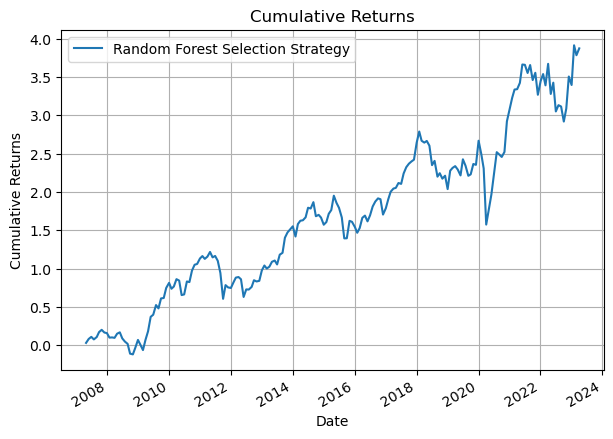

In [53]:
eqg_backtest.performance_summary()

In [54]:
display(eqg_backtest.predictions)
display(eqg_backtest.returns)

,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,1.0000,1.0000,1.0000,0,0,1.0000,0.0000
2007-06-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,1.0000,1.0000,1.0000,0,0,1.0000,1.0000
2007-07-02,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,1.0000,1.0000,1.0000,0,0,1.0000,1.0000
2007-08-01,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,1.0000,1.0000,1.0000,0,0,1.0000,0.0000
2007-09-04,1.0000,1.0000,0,1.0000,0,0,1.0000,1.0000,0,0,...,0,0,0,1.0000,1.0000,1.0000,0,0,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2023-01-03,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2023-02-01,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000,0.0000


,Asset 1,Asset 2,Asset 3,Asset 4,Asset 5,Asset 6,Asset 7,Asset 8,Asset 9,Asset 10,...,Asset 43,Asset 44,Asset 45,Asset 46,Asset 47,Asset 48,Asset 49,Asset 50,Asset 51,Asset 52
Date,,,,,,,,,,,,,,,,,,,,,
2003-04-14,0.0059,0.0035,0.0000,0.0069,0.0000,0.0000,0.0090,0.0042,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0028,-0.0009,-0.0028,0.0000,0.0000,0.0207,0.0204
2003-05-01,0.1023,0.1299,0.0000,0.0811,0.0000,0.0000,0.0997,0.0606,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0328,0.0056,0.0169,0.0000,0.0000,0.0332,0.0638
2003-06-02,0.0422,0.3734,0.0000,0.1223,0.0000,0.0000,0.1478,0.2189,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0603,0.0047,0.0370,0.0000,0.0000,0.0593,0.0683
2003-07-01,0.1001,0.1734,0.0000,0.0544,0.0000,0.0000,0.0618,0.1381,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0115,0.0035,-0.0025,0.0000,0.0000,0.0158,0.0260
2003-08-01,0.0754,0.1196,0.0000,-0.0382,0.0000,0.0000,0.0560,0.0665,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0922,-0.0049,-0.0515,0.0000,0.0000,-0.0002,0.0366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-03,-0.0917,0.0194,0.0177,-0.0209,-0.1047,-0.0451,-0.0171,-0.1395,-0.0683,-0.0274,...,-0.0355,0.1047,0.0044,-0.0383,-0.0001,-0.0179,0.0025,-0.0240,-0.0609,-0.0974
2023-02-01,0.2016,0.0573,0.1621,0.1527,0.2240,0.1977,0.0723,0.1461,0.1303,0.0929,...,0.0778,0.1146,0.0626,0.0690,0.0087,0.0352,0.0379,0.0501,0.0787,0.1378
2023-03-01,-0.0596,0.0690,0.0315,0.0111,0.0119,-0.0233,-0.0422,-0.0084,-0.0827,0.0155,...,-0.0085,-0.0294,-0.0526,-0.0699,-0.0116,-0.0473,-0.0412,-0.0571,-0.0391,-0.0323


In [55]:
eval_rets = eqg_backtest.returns.loc[eqg_backtest.predictions.index]
equal_rets = (eval_rets * 1/len(eval_rets.columns)).sum(axis=1).to_frame('Equal Weight Portfolio Return')
equal_rets.describe()

,Equal Weight Portfolio Return
count,192.0000
mean,0.0074
std,0.0571
min,-0.2336
25%,-0.0242
50%,0.0106
75%,0.0383
max,0.1610


In [56]:
eqg_all_rets = pd.concat([equal_rets, eqg_backtest.strat_rets], axis=1)
calc_summary_statistics(eqg_all_rets, annual_factor=12, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy
Annualized Mean,0.0892,0.1164
Annualized Vol,0.1978,0.1837
Min,-0.2336,-0.2213
Max,0.1610,0.1592
Skewness,-0.6043,-0.5015
Excess Kurtosis,2.2563,2.1556
Historical VaR (5.00%),-0.0881,-0.0695
Annualized Historical VaR (5.00%),-0.3053,-0.2407
Historical CVaR (5.00%),-0.1359,-0.1162
Annualized Historical CVaR (5.00%),-0.4706,-0.4025


None

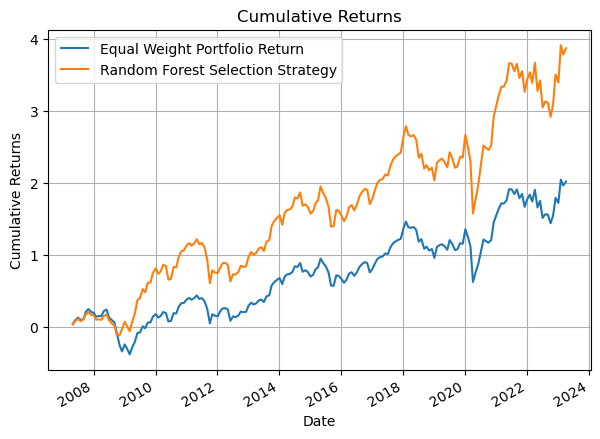

In [57]:
display(calc_cumulative_returns(eqg_all_rets))

In [58]:
# Adding MVO to the mix
eqg_backtest.calc_strat_rets(strat_name = 'Random Forest MVO', selection='classifier', weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})
eqg_backtest.calc_strat_rets(strat_name = 'No Selection MVO', selection=None, weighting='ridge_MVO', 
                         mvo_params={'sigma': 0.02, 'ridge_penalty': 0.01, 'look_back': 26})

In [ ]:
eqg_backtest.mvo_weights

In [63]:
eqg_all_rets = pd.concat([equal_rets, eqg_backtest.strat_rets], axis=1)
calc_summary_statistics(eqg_all_rets, annual_factor=12, correlations=False, keep_columns=['Annualized Mean',
                                                                                      'Annualized Vol',
                                                                                      'Min',
                                                                                      'Max',
                                                                                      'Skewness',
                                                                                      'Excess Kurtosis',
                                                                                      'Historical VaR',
                                                                                      'Historical CVaR',
                                                                                      'Max Drawdown',
                                                                                      'Peak',
                                                                                      'Bottom',
                                                                                      'Recover',
                                                                                      'Duration (days)']).T

Assuming excess returns were provided to calculate Sharpe. If returns were provided (steady of excess returns), the column "Sharpe" is actually "Mean/Volatility"


,Equal Weight Portfolio Return,Random Forest Selection Strategy,Random Forest MVO Strategy,No Selection MVO Strategy
Annualized Mean,0.0892,0.1164,0.0669,0.0365
Annualized Vol,0.1978,0.1837,0.2532,0.2730
Min,-0.2336,-0.2213,-0.2166,-0.2903
Max,0.1610,0.1592,0.2154,0.2006
Skewness,-0.6043,-0.5015,-0.3204,-0.6714
Excess Kurtosis,2.2563,2.1556,0.6646,1.7778
Historical VaR (5.00%),-0.0881,-0.0695,-0.1259,-0.1192
Annualized Historical VaR (5.00%),-0.3053,-0.2407,-0.4360,-0.4130
Historical CVaR (5.00%),-0.1359,-0.1162,-0.1634,-0.1938
Annualized Historical CVaR (5.00%),-0.4706,-0.4025,-0.5660,-0.6714


None

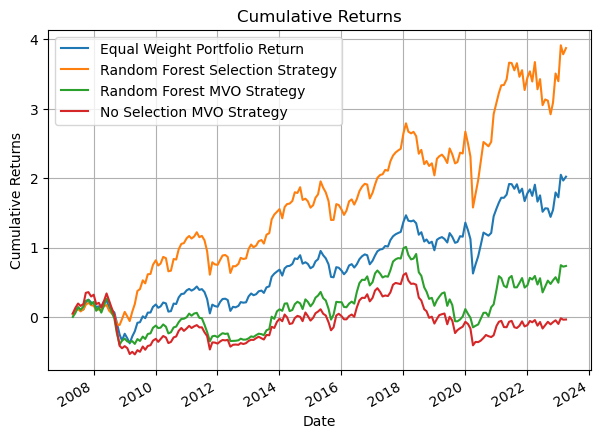

In [60]:
display(calc_cumulative_returns(eqg_all_rets))

In [ ]:
# Writing key results from Backtest
# Backtest Hyperparameter Selections
with open(DATA_PATH + "equity_global_hyperparams.txt", "w") as eqg_hyperparams:
    for params, i in zip(eqg_backtest.model._params_hist, range(len(eqg_backtest.model._params_hist))):
        eqg_hyperparams.write(f'Equity Global Backtest Period {i} Params:\n')
        for param in params:
            eqg_hyperparams.write(f'\t{param}: {params[param]}\n')
        eqg_hyperparams.write('\n')

# Backtest Classifier Selections
eqg_backtest.predictions.to_excel('equity_global_predictions.xlsx')